$\textbf{Plots}$
-
<b>Author:</b>

Soroño, Alliah Mari O.
<hr>

$\textbf{General Instructions}$

a. For Bar Graph:

Create a horizontal stacked bar chart
Transform 1 into “Yes” and 0 into “No”
Follow the plot specification for bar plot

b. For Sankey Diagram:

Create a Sankey Diagram that connects ('PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS') to the LABELS to ('Reg', 'Aca', 'Oth')
Follow the Path Specifications


C. Network Graph

Create the network graph
D,F,I,N,S should created as a pentagram located at the center of the graph showing connection with each other.
The others should be outside of the the pentagram, still showing connections to other nodes.
The node color should be:

Blue: [D,F,I,N,S], Green: ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA’], Yellow: ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']
<hr>

$\textbf{Imports}$


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
import numpy as np

$\textbf{Bar Graph}$


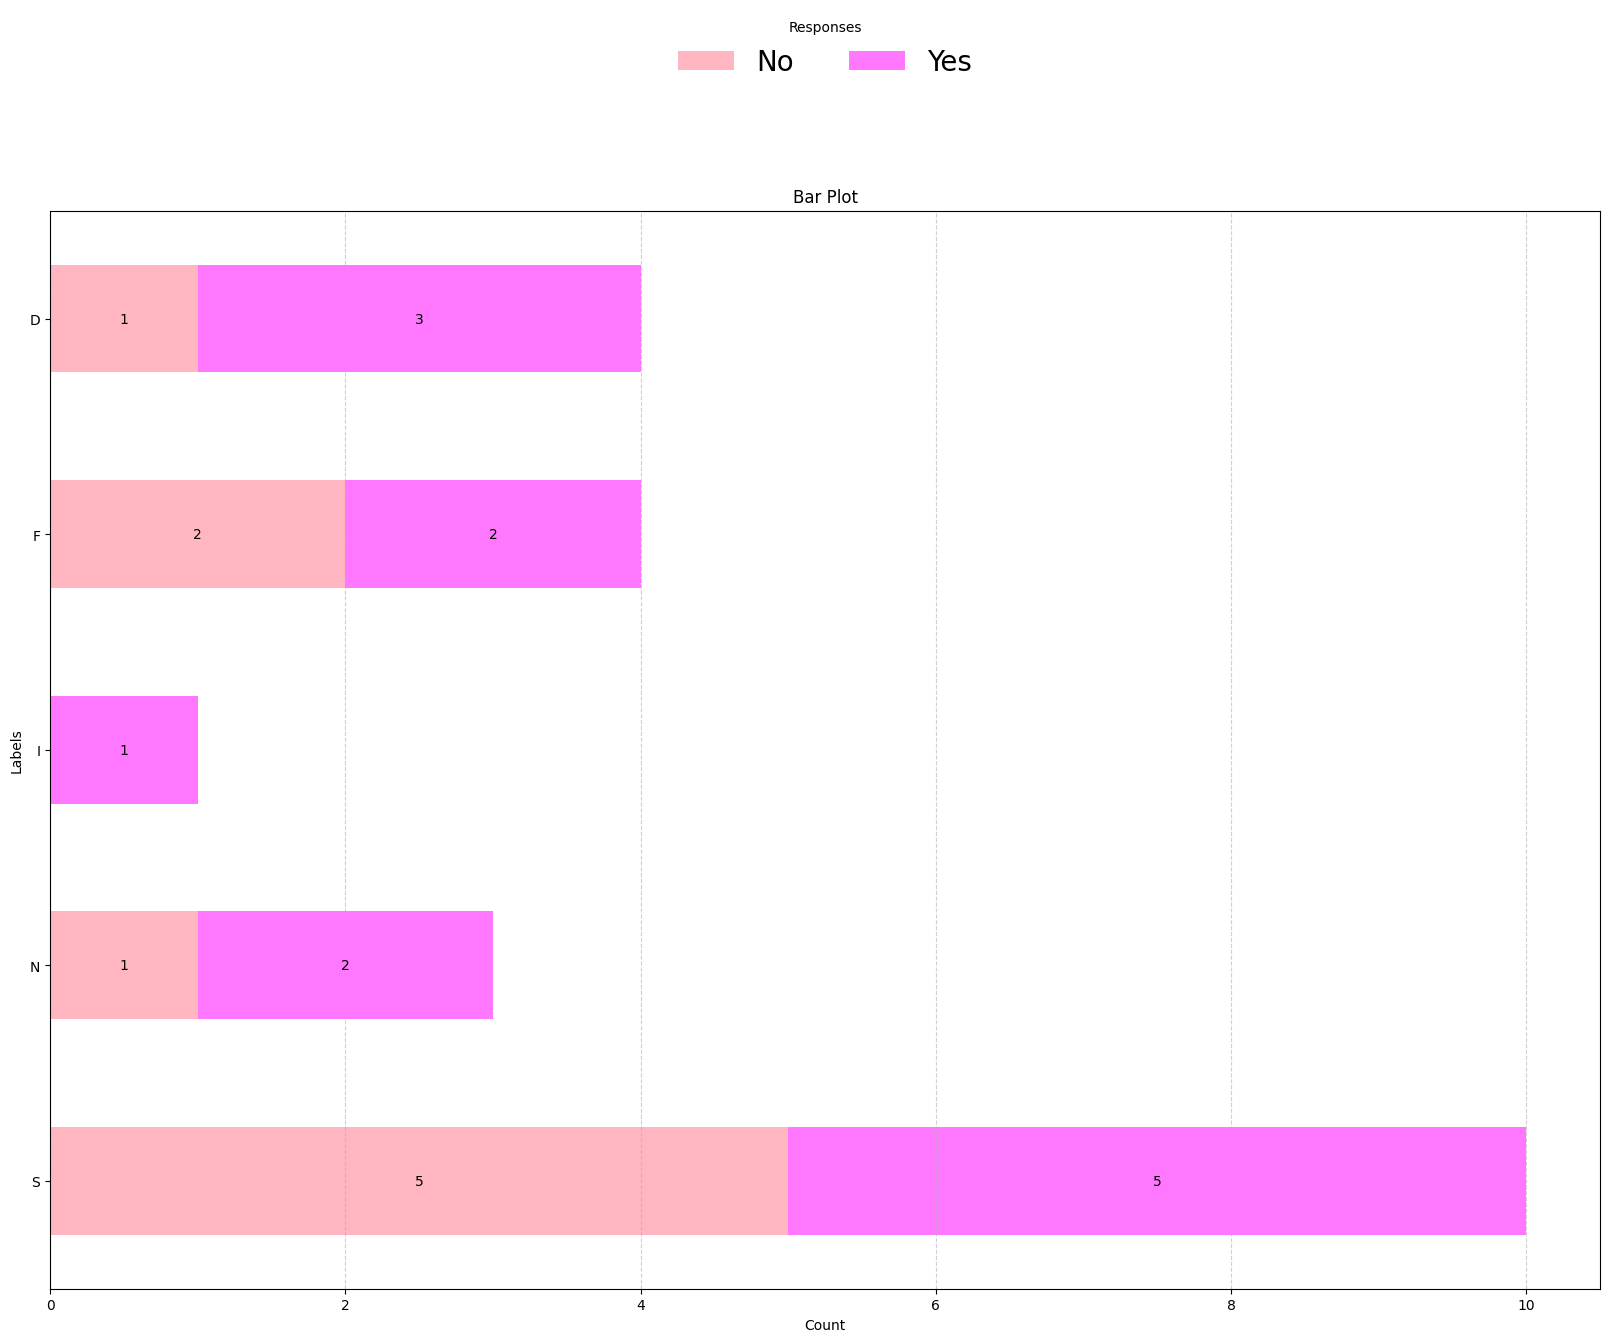

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

bar_df = pd.read_csv("bar_assignment.csv")
bar_counts = bar_df.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)
bar_counts.columns = ["No", "Yes"]
bar_counts = bar_counts.sort_index(ascending=False)

fig, ax = plt.subplots(figsize=(20, 14))

bar_counts.plot(kind="barh", stacked=True, ax=ax, color=["#FFB6C1", "#FF77FF"])

for container in ax.containers:
    ax.bar_label(container, labels=[int(v) if v > 0 else "" for v in container.datavalues], label_type="center")

ax.set(title="Bar Plot", xlabel="Count", ylabel="Labels")

ax.grid(True, axis='x', linestyle='--', alpha=0.6)

ax.legend(["No", "Yes"], title="Responses", loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=2, fontsize=20, frameon=False)

plt.show()




$\textbf{Sankey Diagram}$


In [12]:
import pandas as pd
import plotly.graph_objects as go

data = pd.read_csv('sankey_assignment.csv')

reshaped_data = data.melt(id_vars=['LABEL'], var_name='origin', value_name='flow_value')
reshaped_data.rename(columns={'LABEL': 'destination'}, inplace=True)
reshaped_data = reshaped_data[['origin', 'destination', 'flow_value']]

phase1 = reshaped_data.head(40)

phase2 = reshaped_data.tail(len(reshaped_data) - 40).copy()
phase2 = phase2[['destination', 'origin', 'flow_value']]
phase2.rename(columns={'destination': 'origin', 'origin': 'destination'}, inplace=True)

merged_data = pd.concat([phase1, phase2], axis=0)

all_nodes = list(pd.unique(merged_data[['origin', 'destination']].values.ravel('K')))
node_index_mapping = {node: idx for idx, node in enumerate(all_nodes)}

merged_data['origin'] = merged_data['origin'].map(node_index_mapping)
merged_data['destination'] = merged_data['destination'].map(node_index_mapping)

links_data = merged_data.to_dict(orient='list')

node_colors_hex = [
    "#F8A7D6", "#F65D98", "#D87DC8", "#A8B6E2", "#A8A8D8", "#F2B0A3", "#C18C9B", "#B1A29D", 
    "#B8C1A1", "#F9D9E3", "#C7D8E5", "#F3B6D2", "#F9A8B2", "#D6B0B2", "#E8C6C7", "#A8B8F5"
]

node_colors = {node: node_colors_hex[i % len(node_colors_hex)] for i, node in enumerate(all_nodes)}

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20, 
        thickness=25,  
        line=dict(color='black', width=1),  
        label=all_nodes,  
        color=[node_colors[node] for node in all_nodes],  
    ),
    link=dict(
        source=links_data['origin'],  
        target=links_data['destination'],  
        value=links_data['flow_value'], 
        color=[node_colors[all_nodes[src]] for src in links_data['origin']],  
    )
)])

fig.update_layout(
    title_text="Sankey Diagram", 
    title_x=0.5,  
    font_size=12,  
    font_family="Arial",  
    paper_bgcolor="whitesmoke",  
    plot_bgcolor="whitesmoke",  
    height=600,  
    showlegend=True 
)

fig.show()


$\textbf{Network Graph}$


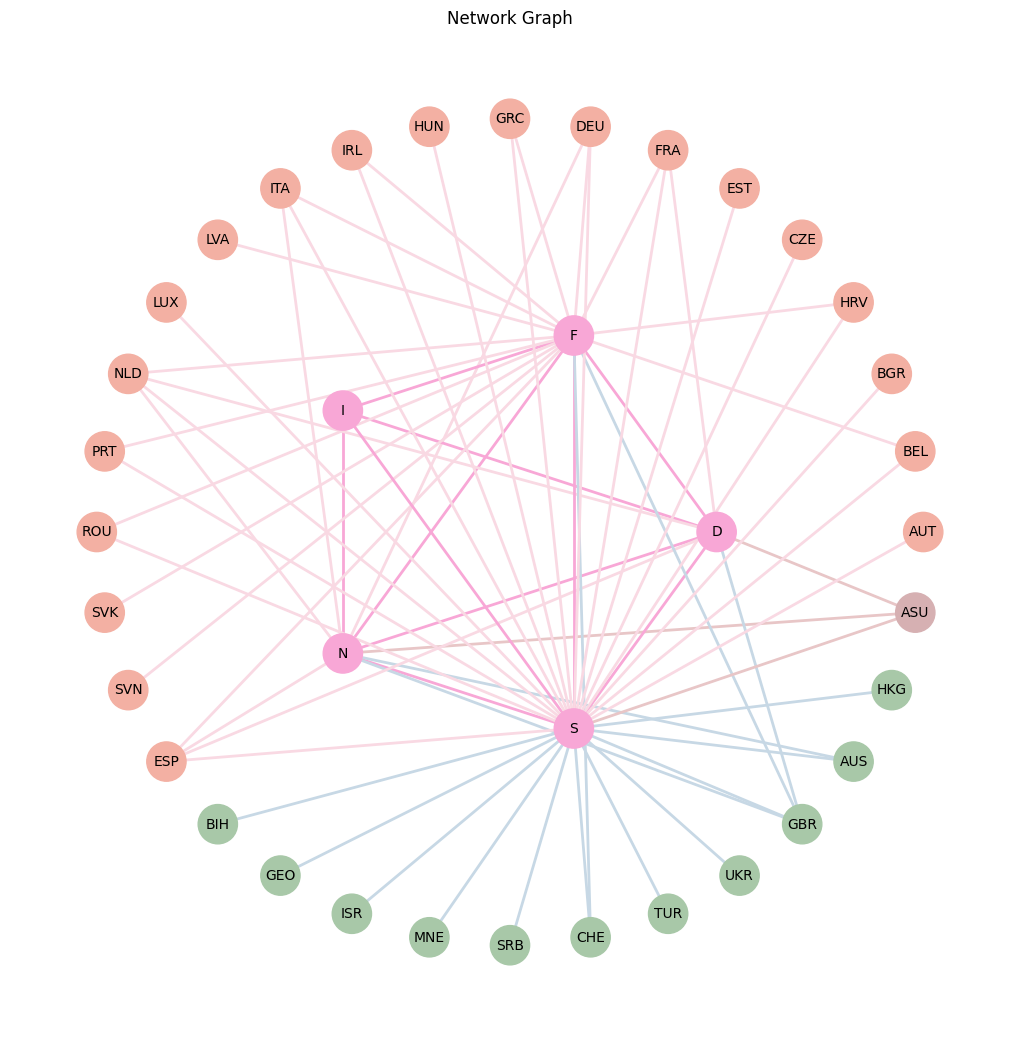

In [13]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def load_and_create_graph(csv_path):
    data = pd.read_csv(csv_path)
    G = nx.Graph()
    nodes = data.columns[1:].tolist()
    G.add_nodes_from(nodes)
    
    for _, row in data.iterrows():
        node = row['LABELS']
        for target, value in row[1:].items():
            if value > 0:
                G.add_edge(node, target, weight=value)
    return G, nodes

def calculate_positions_and_colors(nodes):
    pentagon_nodes = ['D', 'F', 'I', 'N', 'S']
    angle = np.linspace(0, 2 * np.pi, len(pentagon_nodes), endpoint=False)
    pos = {node: (np.cos(a), np.sin(a)) for node, a in zip(pentagon_nodes, angle)}

    outer_radius = 2
    yellow_nodes = [node for node in nodes if node in ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']]
    green_nodes = [node for node in nodes if node in ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'USA']]
    gray_nodes = ['ASU']
    outer_nodes = yellow_nodes + green_nodes + gray_nodes

    outer_angle = np.linspace(0, 2 * np.pi, len(outer_nodes), endpoint=False)
    for i, node in enumerate(outer_nodes):
        pos[node] = (outer_radius * np.cos(outer_angle[i]), outer_radius * np.sin(outer_angle[i]))

    color_map = {
        'D': '#F8A7D6', 'F': '#F8A7D6', 'I': '#F8A7D6', 'N': '#F8A7D6', 'S': '#F8A7D6',
        'BIH': '#A8C8A8', 'GEO': '#A8C8A8', 'ISR': '#A8C8A8', 'MNE': '#A8C8A8', 'SRB': '#A8C8A8',
        'CHE': '#A8C8A8', 'TUR': '#A8C8A8', 'UKR': '#A8C8A8', 'GBR': '#A8C8A8', 'AUS': '#A8C8A8',
        'HKG': '#A8C8A8', 'USA': '#A8C8A8', 
        'AUT': '#F3B0A3', 'BEL': '#F3B0A3', 'BGR': '#F3B0A3', 'HRV': '#F3B0A3', 'CZE': '#F3B0A3',
        'EST': '#F3B0A3', 'FRA': '#F3B0A3', 'DEU': '#F3B0A3', 'GRC': '#F3B0A3', 'HUN': '#F3B0A3',
        'IRL': '#F3B0A3', 'ITA': '#F3B0A3', 'LVA': '#F3B0A3', 'LUX': '#F3B0A3', 'NLD': '#F3B0A3',
        'PRT': '#F3B0A3', 'ROU': '#F3B0A3', 'SVK': '#F3B0A3', 'SVN': '#F3B0A3', 'ESP': '#F3B0A3',
        'ASU': '#D6B0B2'
    }
    
    return pos, color_map, pentagon_nodes, outer_nodes, yellow_nodes, green_nodes, gray_nodes

def filter_edges_for_display(G, display_nodes):
    return [(u, v) for u, v in G.edges() if u in display_nodes and v in display_nodes]

def determine_edge_colors(outer_nodes, yellow_nodes, green_nodes, gray_nodes, G):
    edge_colors = []
    for u, v in G.edges():
        if v in yellow_nodes:
            edge_colors.append('#F9D9E3')
        elif v in green_nodes:
            edge_colors.append('#C7D8E5')
        elif v in gray_nodes:
            edge_colors.append('#E8C6C7')
        else:
            edge_colors.append('#F8A7D6')
    return edge_colors

def draw_network(H, subgraph_pos, subgraph_colors, edge_colors):
    plt.figure(figsize=(10, 10))
    nx.draw(H, pos=subgraph_pos, with_labels=True, node_color=subgraph_colors, node_size=800, font_size=10, edge_color=edge_colors, width=2)
    plt.title('Network Graph')
    plt.show()

def main():
    csv_path = 'networks_assignment.csv'
    G, nodes = load_and_create_graph(csv_path)
    
    pos, color_map, pentagon_nodes, outer_nodes, yellow_nodes, green_nodes, gray_nodes = calculate_positions_and_colors(nodes)
    
    node_colors = [color_map.get(node, '#A8B6E2') for node in G.nodes()]
    
    display_nodes = pentagon_nodes + outer_nodes
    display_edges = filter_edges_for_display(G, display_nodes)
    
    H = G.edge_subgraph(display_edges).copy()
    subgraph_pos = {node: pos[node] for node in H.nodes()}
    subgraph_colors = [color_map[node] for node in H.nodes()]
    
    edge_colors = determine_edge_colors(outer_nodes, yellow_nodes, green_nodes, gray_nodes, H)
    
    draw_network(H, subgraph_pos, subgraph_colors, edge_colors)

if __name__ == '__main__':
    main()
